In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/covid_19_india.csv'
df = pd.read_csv(file_path)

# Show dataset size
print("Initial dataset shape:", df.shape)

# Remove duplicates
df_cleaned = df.drop_duplicates()

# Remove missing values
df_cleaned = df_cleaned.dropna()






# Rename columns (lowercase, no spaces)
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

# Save cleaned data
cleaned_file_path = '/content/covid_19_india.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print("Cleaned dataset shape:", df_cleaned.shape)
print(f"Cleaned data saved to {cleaned_file_path}")


Initial dataset shape: (18110, 9)
Cleaned dataset shape: (18070, 9)
Cleaned data saved to /content/covid_19_india.csv


In [ ]:
import pandas as pd
import sqlite3

# Load the dataset
file_path = '/content/covid_19_india.csv'
df = pd.read_csv(file_path)

# Show dataset shape
print("Initial dataset shape:", df.shape)

# Create SQLite database
conn = sqlite3.connect('covid_data.db')
cursor = conn.cursor()

# Save data to database
df.to_sql('covid_data', conn, index=False, if_exists='replace')

# Remove duplicate rows
df_cleaned = pd.read_sql("""
    SELECT DISTINCT * FROM covid_data
""", conn)

# Remove rows with missing values
df_cleaned = df_cleaned.dropna()

# Standardize column names
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

# Save cleaned data to database
df_cleaned.to_sql('covid_data_cleaned', conn, index=False, if_exists='replace')

# Save cleaned data to CSV
cleaned_file_path = '/content/covid_19_india.csvv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print("Cleaned dataset shape:", df_cleaned.shape)
print(f"Cleaned data saved to {cleaned_file_path} and stored in database")

# Close database connection
conn.close()


Initial dataset shape: (18070, 9)
Cleaned dataset shape: (18070, 9)
Cleaned data saved to /content/covid_19_india.csvv and stored in database


Initial dataset shape: (18070, 9)
Cleaned dataset shape: (18070, 9)
Cleaned data saved to /content/covid_19_india.csv
Columns in cleaned dataset: Index(['sno', 'date', 'time', 'state_unionterritory',
       'confirmedindiannational', 'confirmedforeignnational', 'cured',
       'deaths', 'confirmed'],
      dtype='object')


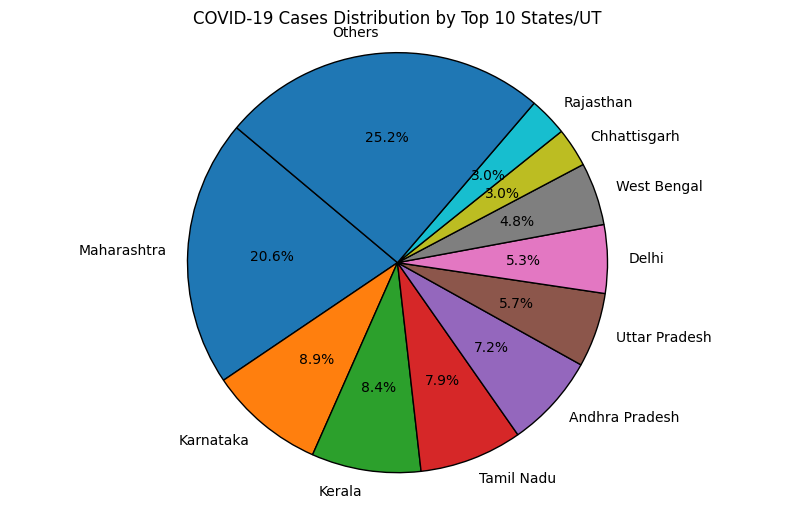

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/covid_19_india.csv'
df = pd.read_csv(file_path)

# Print dataset shape
print("Initial dataset shape:", df.shape)

# Create database connection
conn = sqlite3.connect('covid_data.db')
cursor = conn.cursor()

# Save data to SQL database
df.to_sql('covid_data', conn, index=False, if_exists='replace')

# Remove duplicate rows
df_cleaned = pd.read_sql("""
    SELECT DISTINCT * FROM covid_data
""", conn)

# Drop missing values
df_cleaned = df_cleaned.dropna()

# Standardize column names
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace('[^a-zA-Z0-9_]', '_', regex=True)

# Save cleaned data to SQL database
df_cleaned.to_sql('covid_data_cleaned', conn, index=False, if_exists='replace')

# Save cleaned data as CSV
cleaned_file_path = '/content/covid_19_india.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print("Cleaned dataset shape:", df_cleaned.shape)
print(f"Cleaned data saved to {cleaned_file_path}")

# Print column names
print("Columns in cleaned dataset:", df_cleaned.columns)

# Create pie chart if required columns exist
if 'state_unionterritory' in df_cleaned.columns and 'confirmed' in df_cleaned.columns:
    state_wise_cases = df_cleaned.groupby('state_unionterritory')['confirmed'].sum()

    # Get top 10 states
    top_states = state_wise_cases.sort_values(ascending=False).head(10)
    other_cases = state_wise_cases.sum() - top_states.sum()

    labels = list(top_states.index) + ['Others']
    sizes = list(top_states.values) + [other_cases]

    # Plot pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
    plt.title("COVID-19 Cases Distribution by Top 10 States/UT")
    plt.axis('equal')
    plt.show()
else:
    print("Error: Required columns not found in the dataset.")

# Close database connection
conn.close()


Top 10 States/UTs by Cured Cases :
                          cured    deaths
state_unionterritory                     
Maharashtra***        6000911.0  130753.0
Kerala                3396184.0   18004.0
Karnataka             2861499.0   36848.0
Karanataka            2821491.0   36197.0
Tamil Nadu            2524400.0   34367.0
Andhra Pradesh        1952736.0   13564.0
Uttar Pradesh         1685492.0   22775.0
West Bengal           1506532.0   18252.0
Delhi                 1411280.0   25068.0
Chhattisgarh           988189.0   13544.0


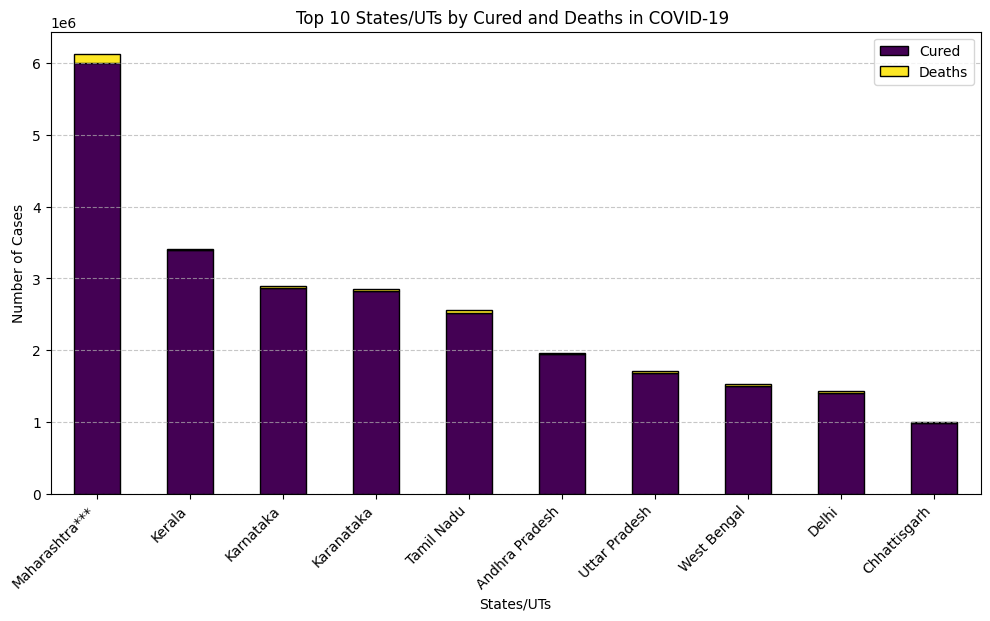

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming it's in /content/ for Colab)
df = pd.read_csv("/content/covid_19_india.csv")

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace('[^a-zA-Z0-9_]', '_', regex=True)

# Get the latest data for each state (last entry)
latest_data = df.groupby('state_unionterritory').last()[['cured', 'deaths']]

# Exclude Maharashtra from the data
latest_data = latest_data[latest_data.index != 'Maharashtra']

# Select top 10 states with the highest cured cases
top_states = latest_data.sort_values(by='cured', ascending=False).head(10)

# Print to verify the data (Maharashtra should not appear)
print("Top 10 States/UTs by Cured Cases :")
print(top_states)

# Plot bar graph
plt.figure(figsize=(12, 6))
top_states.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', ax=plt.gca())

# Labels and title
plt.xlabel("States/UTs")
plt.ylabel("Number of Cases")
plt.title("Top 10 States/UTs by Cured and Deaths in COVID-19 ")
plt.xticks(rotation=45, ha='right')
plt.legend(["Cured", "Deaths"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

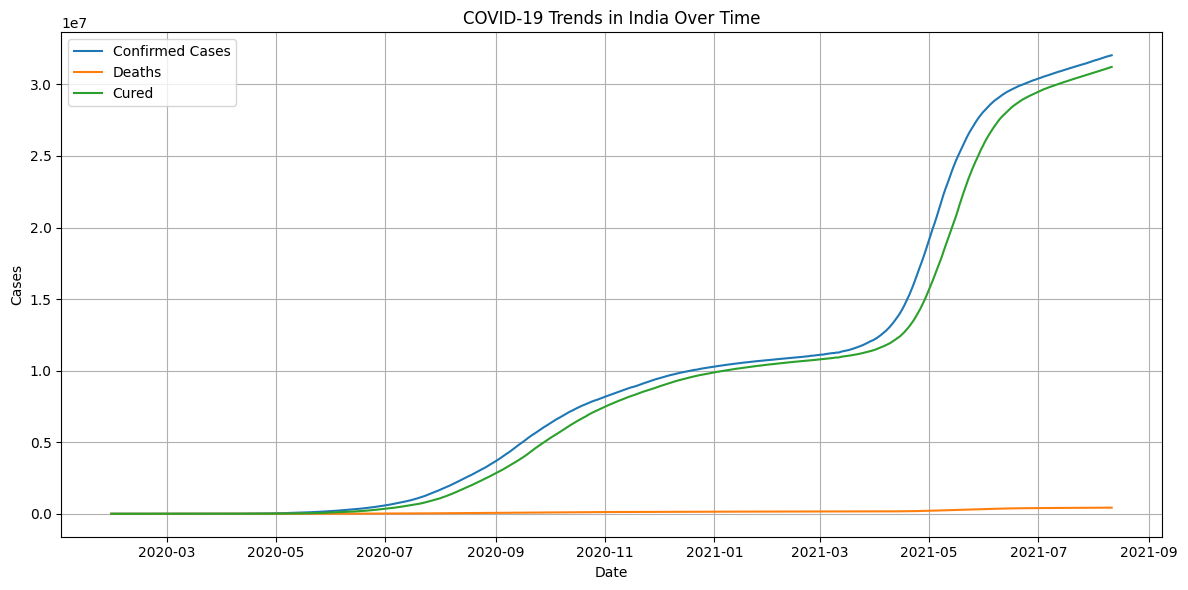

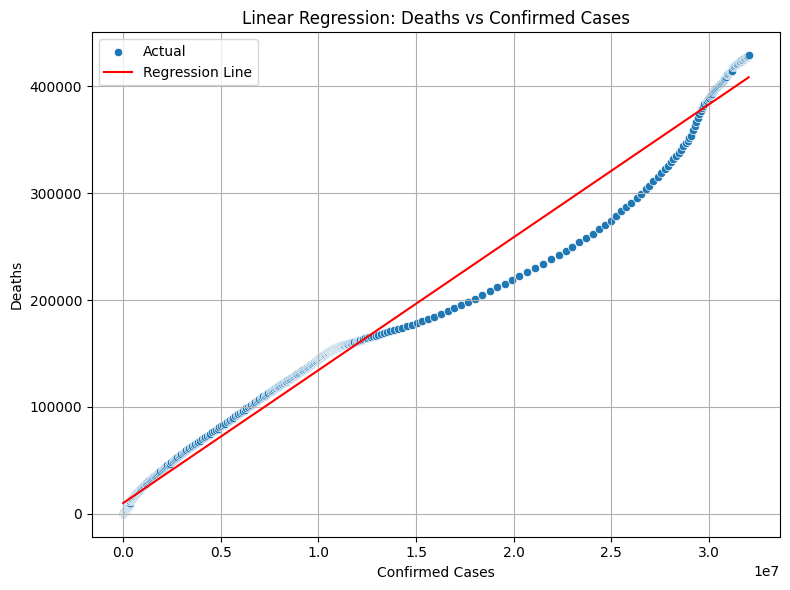

Coefficient: 0.0124392212264169
Intercept: 10043.9073295173
R-squared: 0.9870167751053325
Mean Squared Error: 211031643.31078303


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("covid_19_india (updated ).csv")

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Convert confirmed nationals to numeric
df['confirmedindiannational'] = pd.to_numeric(df['confirmedindiannational'], errors='coerce')
df['confirmedforeignnational'] = pd.to_numeric(df['confirmedforeignnational'], errors='coerce')

# Fill NaN values with 0
df[['confirmedindiannational', 'confirmedforeignnational']] = df[['confirmedindiannational', 'confirmedforeignnational']].fillna(0)

# Group by date
daily_data = df.groupby('date')[['confirmed', 'cured', 'deaths']].sum().reset_index()

# Plot trends over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['date'], daily_data['confirmed'], label='Confirmed Cases')
plt.plot(daily_data['date'], daily_data['deaths'], label='Deaths')
plt.plot(daily_data['date'], daily_data['cured'], label='Cured')
plt.title('COVID-19 Trends in India Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Linear Regression: Predicting deaths based on confirmed cases
X = daily_data[['confirmed']]
y = daily_data['deaths']

model = LinearRegression()
model.fit(X, y)

# Predicting
y_pred = model.predict(X)

# Plot regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x='confirmed', y='deaths', data=daily_data, label='Actual')
plt.plot(daily_data['confirmed'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Deaths vs Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print model evaluation
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared: {r2_score(y, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred)}")


Confusion Matrix:
[[54  7]
 [ 0 50]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        61
           1       0.88      1.00      0.93        50

    accuracy                           0.94       111
   macro avg       0.94      0.94      0.94       111
weighted avg       0.94      0.94      0.94       111


Accuracy: 0.9369369369369369


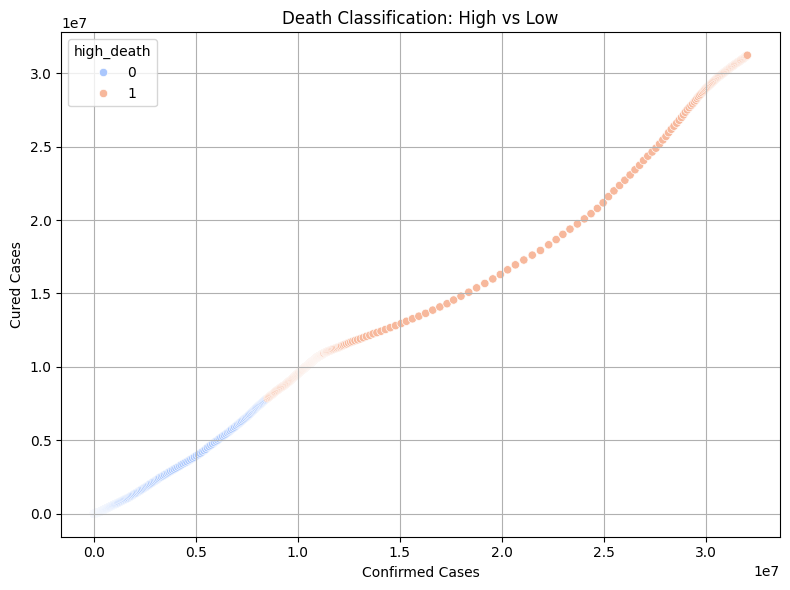

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv("covid_19_india (updated ).csv")

# Data preprocessing
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['confirmedindiannational'] = pd.to_numeric(df['confirmedindiannational'], errors='coerce')
df['confirmedforeignnational'] = pd.to_numeric(df['confirmedforeignnational'], errors='coerce')
df[['confirmedindiannational', 'confirmedforeignnational']] = df[['confirmedindiannational', 'confirmedforeignnational']].fillna(0)

# Aggregate data by date
daily_data = df.groupby('date')[['confirmed', 'cured', 'deaths']].sum().reset_index()

# Create binary target: 1 if deaths > median, else 0
median_deaths = daily_data['deaths'].median()
daily_data['high_death'] = (daily_data['deaths'] > median_deaths).astype(int)

# Features and target
X = daily_data[['confirmed', 'cured']]
y = daily_data['high_death']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")

# Plotting decision boundary (2D for visual understanding)
plt.figure(figsize=(8,6))
sns.scatterplot(data=daily_data, x='confirmed', y='cured', hue='high_death', palette='coolwarm')
plt.title('Death Classification: High vs Low')
plt.xlabel('Confirmed Cases')
plt.ylabel('Cured Cases')
plt.grid(True)
plt.tight_layout()
plt.show()


Explained Variance Ratio (PCA): [0.99874129 0.00125871]

Confusion Matrix:
[[ 8 53]
 [ 0 50]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.13      0.23        61
           1       0.49      1.00      0.65        50

    accuracy                           0.52       111
   macro avg       0.74      0.57      0.44       111
weighted avg       0.77      0.52      0.42       111


Accuracy: 0.5225225225225225


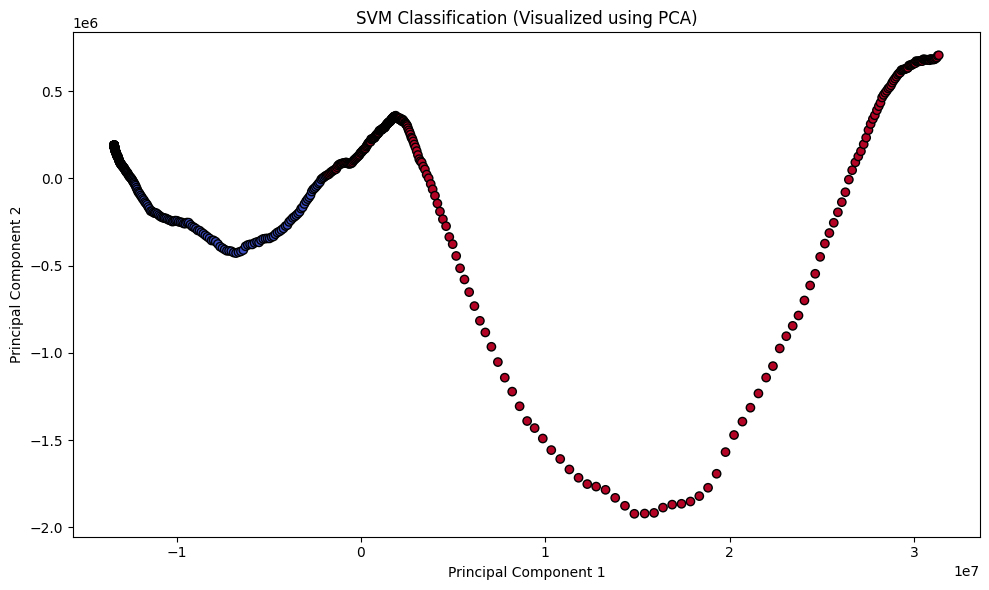

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load and clean the dataset
df = pd.read_csv("covid_19_india (updated ).csv")
df.columns = df.columns.str.lower().str.strip()

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Convert relevant columns to numeric
df['confirmedindiannational'] = pd.to_numeric(df['confirmedindiannational'], errors='coerce').fillna(0)
df['confirmedforeignnational'] = pd.to_numeric(df['confirmedforeignnational'], errors='coerce').fillna(0)

# Group data by date
daily_data = df.groupby('date')[['confirmed', 'cured', 'deaths', 'confirmedindiannational', 'confirmedforeignnational']].sum().reset_index()

# Create binary target based on median deaths
median_deaths = daily_data['deaths'].median()
daily_data['high_death'] = (daily_data['deaths'] > median_deaths).astype(int)

# Step 2: Define features and target
features = ['confirmed', 'cured', 'confirmedindiannational', 'confirmedforeignnational']
X = daily_data[features]
y = daily_data['high_death']

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("Explained Variance Ratio (PCA):", pca.explained_variance_ratio_)

# Step 5: Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = svm_model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")

# Step 7: Visualize using PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM Classification (Visualized using PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()


Confusion Matrix:
 [[46  2]
 [ 0 35]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.95      1.00      0.97        35

    accuracy                           0.98        83
   macro avg       0.97      0.98      0.98        83
weighted avg       0.98      0.98      0.98        83


Accuracy: 0.9759036144578314


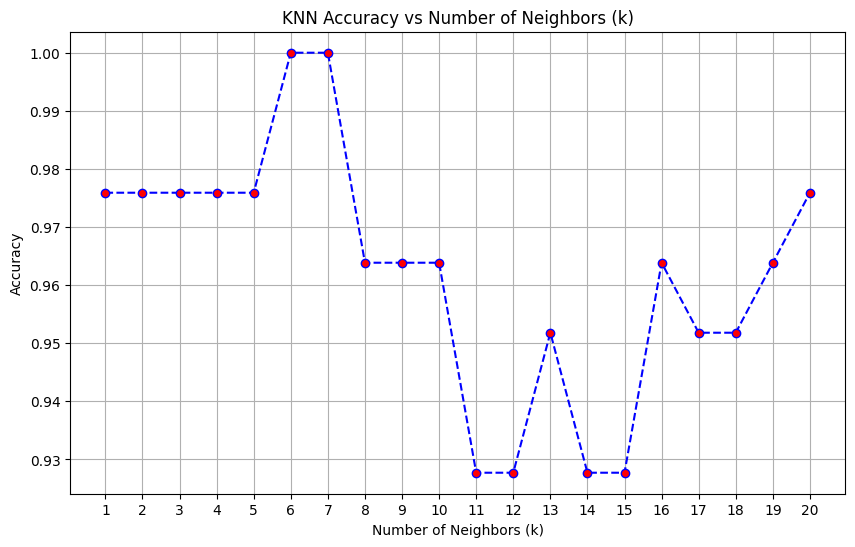

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/covid_19_india (updated ).csv'
df = pd.read_csv(file_path)

# Drop missing values
df_clean = df.dropna()

# Convert numerical columns to numeric (handle non-numeric like '-')
numeric_cols = ['confirmedindiannational', 'confirmedforeignnational', 'cured', 'deaths']
df_clean[numeric_cols] = df_clean[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaNs in important columns
df_clean = df_clean.dropna(subset=numeric_cols + ['confirmed'])

# Define features and target
X = df_clean[numeric_cols]
median_confirmed = df_clean['confirmed'].median()
y = (df_clean['confirmed'] > median_confirmed).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# KNN Accuracy Graph
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('KNN Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_range)
plt.show()
